**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

In [1]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sangeethakrishnan10/Project_dataset/main/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

**Part_ID**

In [5]:
del df["PRT_ID"]  # we need to delete the faeture- Part id because to avoid overfitting

In [6]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


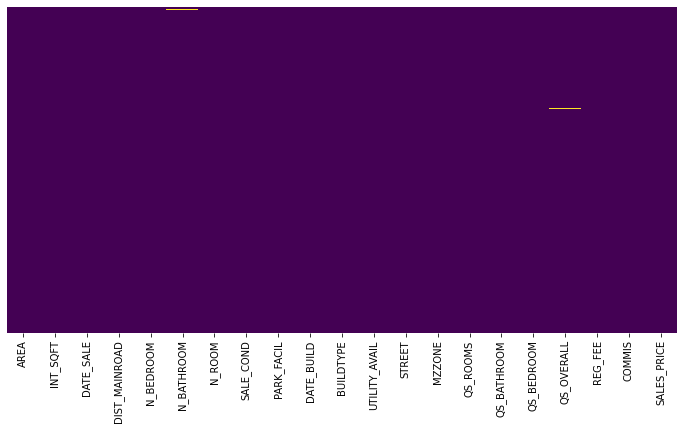

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**AREA**

In [9]:
df.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [10]:
df.AREA.dtypes

dtype('O')

In [11]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [12]:
df.AREA = df.AREA.map({"Karapakam":"Karapakkam",'Ana Nagar':'Anna Nagar',"Ann Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery",
                       "Chormpet":"Chrompet","Chrompt":"Chrompet","Chrmpet":"Chrompet","KKNagar":"KK Nagar","TNagar":"T Nagar"}).fillna(df.AREA)

In [13]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [14]:
df.AREA

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [15]:
df.AREA.isnull().sum()

0

**INT_SQFT**

In [16]:
df.INT_SQFT.unique()

array([1004, 1986,  909, ...,  688, 2051,  598])

In [17]:
df.INT_SQFT.isnull().sum()

0

In [18]:
df.INT_SQFT.dtypes

dtype('int64')

In [19]:
df.INT_SQFT = df.INT_SQFT.astype('int64') # explicilty type casting
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [20]:
# #IQR
# q3 = df.INT_SQFT.quantile(0.75)
# q1 = df.INT_SQFT.quantile(0.25)
# iqr = q3 - q1 

In [21]:
# #thresholds
# q3 + (1.5 * iqr)

In [22]:
# q1 - (1.5*iqr)

In [23]:
# #outlier detection
# df.INT_SQFT = df.INT_SQFT.clip(-133.5,2870.5) #.clip(lt,ut)

In [24]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

**DATE_SALE**

In [25]:
df.DATE_SALE.values[0]

'04-05-2011'

In [26]:
df.DATE_SALE.head()

0    04-05-2011
1    19-12-2006
2    04-02-2012
3    13-03-2010
4    05-10-2009
Name: DATE_SALE, dtype: object

In [27]:
df["DATE_SALE"].dtypes

dtype('O')

In [28]:
df.DATE_SALE.isnull().sum()

0

In [29]:
df.DATE_SALE= pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y' )   #convert date into datetime datatypes

In [30]:
df.DATE_SALE.head()

0   2011-05-04
1   2006-12-19
2   2012-02-04
3   2010-03-13
4   2009-10-05
Name: DATE_SALE, dtype: datetime64[ns]

**DIST_MAINROAD**

In [31]:
df.DIST_MAINROAD.unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48,  39, 177, 116,  41, 192,  72,  24,  43,
        85, 171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,
        67,   0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,
        20,  99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57,
       104,  17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,
        95, 196, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19

In [32]:
df.DIST_MAINROAD.isnull().sum()

0

In [33]:
df.DIST_MAINROAD.dtypes

dtype('int64')

In [34]:
# #IQR
# q3 = df.DIST_MAINROAD.quantile(0.75)
# q1 = df.DIST_MAINROAD.quantile(0.25)
# # iqr = q3 - q1 /

In [35]:
# #thresholds
# q3 + (1.5 * iqr)

In [36]:
# q1 - (1.5*iqr)

In [37]:
# #outlier detection
# df.INT_SQFT = df.DIST_MAINROAD.clip(-97.0,295.0) #.clip(lt,ut)

In [38]:
df["DIST_MAINROAD"].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [39]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

**N_BEDROOM**

In [40]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [41]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [42]:
df.N_BEDROOM.isnull().sum()

1

In [43]:
df["N_BEDROOM"].dtypes

dtype('float64')

In [44]:
df.shape

(7109, 21)

In [45]:
df= df.dropna(subset=["N_BEDROOM"])

In [46]:
df.shape

(7108, 21)

In [47]:
df.N_BEDROOM= df.N_BEDROOM.astype("int64")   # explicilty type casting

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
df["N_BEDROOM"].dtypes

dtype('int64')

In [49]:
df.N_BEDROOM.isnull().sum()

0

**N_BATHROOM**

In [50]:
df.N_BATHROOM.unique()

array([ 1.,  2., nan])

In [51]:
df.N_BATHROOM.value_counts()

1.0    5588
2.0    1515
Name: N_BATHROOM, dtype: int64

In [52]:
df.N_BATHROOM.isnull().sum()

5

In [53]:
df.loc[~df.N_BATHROOM.isin([1,2]),:]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,Anna Nagar,1589,2010-03-22,39,1,NaN,4,Partial,No,02-04-1966,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,Chrompet,1016,2012-08-02,105,1,NaN,3,AbNormal,Yes,10-08-1980,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,Chrompet,916,2012-08-02,173,1,NaN,3,Normal Sale,Yes,12-08-1974,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,Chrompet,1035,2012-11-06,90,1,NaN,3,Partial,No,14-11-1981,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,Anna Nagar,1864,2007-03-05,184,2,NaN,5,Family,Yes,07-03-1997,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [54]:
df.tail(15)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7094,KK Nagar,2456,2008-09-13,171,4,2.0,6,AdjLand,Yes,18-09-1988,...,NoSewr,Gravel,RM,5.0,5.0,3.0,4.200,679450,353880,14155200
7095,Anna Nagar,1955,2007-06-01,33,2,1.0,5,Family,No,08-06-1977,...,NoSewr,Paved,RM,3.7,3.4,2.8,3.265,372645,146396,13308750
7096,Chrompet,1275,2011-05-18,3,2,1.0,4,AbNormal,No,23-05-1988,...,ELO,Gravel,RL,3.9,3.8,4.1,3.920,287798,86339,9593250
7097,Anna Nagar,1860,2010-01-15,174,2,1.0,5,AbNormal,No,17-01-2004,...,AllPub,Gravel,RH,4.6,3.4,3.2,3.740,522119,70557,14111320
7098,Anna Nagar,1611,2013-11-21,144,1,1.0,4,Partial,Yes,22-11-2008,...,NoSeWa,Paved,RM,3.2,3.7,2.9,3.205,432288,209172,13944780
7099,Adyar,895,2011-01-05,197,1,1.0,3,AdjLand,Yes,15-01-1971,...,NoSewr,No Access,I,3.6,4.7,4.2,4.120,250641,7372,7371800
7100,T Nagar,1733,2010-02-24,191,1,1.0,4,AbNormal,Yes,02-03-1985,...,NoSeWa,No Access,RL,3.4,3.7,2.1,2.890,702058,312026,19501600
7101,Karapakkam,666,2010-05-11,51,1,1.0,2,AdjLand,Yes,20-05-1974,...,ELO,Gravel,I,3.2,4.4,2.5,3.280,273317,74541,6211750
7102,Karapakkam,701,2010-02-03,100,1,1.0,2,AbNormal,No,08-02-1990,...,NoSeWa,Gravel,RH,4.2,3.0,2.0,2.960,282175,141088,5643500
7103,Karapakkam,1462,2010-04-23,68,2,2.0,4,Family,No,29-04-1986,...,NoSeWa,Gravel,RM,2.7,3.3,3.6,3.240,356716,178358,9387250


In [55]:
df.N_BATHROOM.describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [56]:
df["N_BATHROOM"].fillna(1,inplace= True)

In [57]:
df.N_BATHROOM.isnull().sum()

0

In [58]:
df["N_BATHROOM"][71]

1.0

In [59]:
df.N_BATHROOM=df.N_BATHROOM.astype("int64")

In [60]:
df.N_BATHROOM.dtypes

dtype('int64')

In [61]:
df.N_BATHROOM.describe()

count    7108.000000
mean        1.213140
std         0.409555
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [62]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

**N_ROOM**

In [63]:
df.N_ROOM.value_counts()

4    2562
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [64]:
df.N_ROOM.unique()

array([3, 5, 4, 2, 6])

In [65]:
df.N_ROOM.describe()

count    7108.000000
mean        3.688661
std         1.019164
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [66]:
df.N_ROOM.dtypes

dtype('int64')

In [67]:
df.N_ROOM.isnull().sum()

0

**SALE_COND**

In [68]:
df.SALE_COND.values

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal Sale', 'Partial',
       'Partial'], dtype=object)

In [69]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [70]:
df.SALE_COND= df.SALE_COND.map({"Adj Land":"AdjLand", "Partiall":"Partial","PartiaLl":"Partial","Ab Normal":"AbNormal"}).fillna(df.SALE_COND)

In [71]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1432
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [72]:
df.SALE_COND.dtypes

dtype('O')

In [73]:
df.SALE_COND.isnull().sum()

0

**PARK_FACIL**

In [74]:
df.PARK_FACIL.values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [75]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3519
Noo       2
Name: PARK_FACIL, dtype: int64

In [76]:
df.PARK_FACIL = df.PARK_FACIL.map({"Noo":"No"}).fillna(df.PARK_FACIL)

In [77]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3521
Name: PARK_FACIL, dtype: int64

In [78]:
df.PARK_FACIL.dtypes

dtype('O')

In [79]:
df.PARK_FACIL.isnull().sum()

0

**DATE_BUILD**

In [80]:
df.DATE_BUILD.values

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [81]:
df.DATE_BUILD.unique()

array(['15-05-1967', '22-12-1995', '09-02-1992', ..., '01-09-1978',
       '11-08-1977', '24-07-1961'], dtype=object)

In [82]:
df.DATE_BUILD.dtypes

dtype('O')

In [83]:
df.DATE_BUILD= pd.to_datetime(df.DATE_BUILD,format= "%d-%m-%Y")   #converting datatypes

In [84]:
df.DATE_BUILD.dtypes

dtype('<M8[ns]')

In [85]:
df.DATE_BUILD.head()

0   1967-05-15
1   1995-12-22
2   1992-02-09
3   1988-03-18
4   1979-10-13
Name: DATE_BUILD, dtype: datetime64[ns]

In [86]:
df.DATE_BUILD.isnull().sum()

0

**New feature- Age of the house**

In [87]:
df["AGE_HOUSE"]= df["DATE_SALE"]-df["DATE_BUILD"].astype('datetime64[Y]')

In [88]:
df.AGE_HOUSE

0      16194 days
1       4370 days
2       7339 days
3       8107 days
4      11235 days
          ...    
7104   17899 days
7105    3385 days
7106   10463 days
7107   11902 days
7108   16264 days
Name: AGE_HOUSE, Length: 7108, dtype: timedelta64[ns]

In [89]:
df['AGE_HOUSE'] = df['AGE_HOUSE'] / np.timedelta64(1, 'Y')

In [90]:
df.AGE_HOUSE

0       44.337666
1       11.964654
2       20.093500
3       22.196212
4       30.760385
          ...    
7104    49.005798
7105     9.267815
7106    28.646721
7107    32.586569
7108    44.529320
Name: AGE_HOUSE, Length: 7108, dtype: float64

In [91]:
df.AGE_HOUSE.dtypes

dtype('float64')

In [92]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

**BUILDTYPE**

In [93]:
df.BUILDTYPE.values

array(['Commercial', 'Commercial', 'Commercial', ..., 'House',
       'Commercial', 'Others'], dtype=object)

In [94]:
df.BUILDTYPE.value_counts()

House         2443
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [95]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [96]:
df.BUILDTYPE= df.BUILDTYPE.map({"Comercial":"Commercial","Other":"Others"}).fillna(df.BUILDTYPE)

In [97]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [98]:
df.BUILDTYPE.dtypes

dtype('O')

In [99]:
df.BUILDTYPE.isnull().sum()

0

**UTILITY_AVAIL**

In [100]:
df.UTILITY_AVAIL.values

array(['AllPub', 'AllPub', 'ELO', ..., 'NoSeWa', 'ELO', 'ELO'],
      dtype=object)

In [101]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1828
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [102]:
df.UTILITY_AVAIL= df.UTILITY_AVAIL.replace("All Pub","AllPub")

In [103]:
df.UTILITY_AVAIL= df.UTILITY_AVAIL.replace("NoSewr ","NoSewr")

In [104]:
df.UTILITY_AVAIL.value_counts()  

AllPub    1887
NoSeWa    1871
NoSewr    1828
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [105]:
df.UTILITY_AVAIL.isnull().sum()

0

In [106]:
df.UTILITY_AVAIL.dtypes

dtype('O')

**STREET**

In [107]:
df.STREET.values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [108]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2009
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [109]:
df.STREET= df.STREET.map({"Pavd":"Paved","NoAccess":"No Access"}).fillna(df.STREET)

In [110]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [111]:
df.STREET.dtypes

dtype('O')

In [112]:
df.STREET.isnull().sum()

0

**MZZONE**

In [113]:
df.MZZONE.values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [114]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1816
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [115]:
df.MZZONE.isnull().sum()

0

In [116]:
df.MZZONE.dtypes

dtype('O')

**QS_ROOMS**

In [117]:
df.QS_ROOMS.isnull().sum()

0

In [118]:
df.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [119]:
df.QS_ROOMS.dtypes

dtype('float64')

In [120]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

**QS_BATHROOM**

In [121]:
df.QS_BATHROOM.unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [122]:
df.QS_BATHROOM.isnull().sum()

0

In [123]:
df.QS_BATHROOM.dtypes

dtype('float64')

**QS_BEDROOM**

In [124]:
df.QS_BEDROOM.unique()

array([4.9, 2.5, 2.2, 3.6, 4.1, 3.1, 2.1, 4. , 3.3, 4.5, 3.7, 4.8, 4.7,
       2.9, 3.4, 2.8, 3.8, 3. , 3.2, 2. , 4.3, 3.9, 3.5, 2.6, 4.4, 2.4,
       4.6, 5. , 2.3, 2.7, 4.2])

In [125]:
df.QS_BEDROOM.isnull().sum()

0

In [126]:
df.QS_BEDROOM.dtypes

dtype('float64')

**QS_OVERALL**

In [127]:
df.QS_OVERALL.unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

In [128]:
df.QS_OVERALL.describe()

count    7060.000000
mean        3.503303
std         0.527244
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [129]:
df.QS_OVERALL.isnull().sum()

48

In [130]:
x= df["QS_OVERALL"].mean()
x

3.503303116147309

In [131]:
df["QS_OVERALL"].fillna(value= x, inplace= True)

In [132]:
df.QS_OVERALL.isnull().sum()

0

In [133]:
df.QS_OVERALL.unique()

array([4.33      , 3.765     , 3.09      , 4.01      , 3.29      ,
       3.32      , 2.67      , 3.26      , 3.55      , 3.16      ,
       3.83      , 2.89      , 2.26      , 3.19      , 3.66      ,
       3.50330312, 3.57      , 4.3       , 3.35      , 4.76      ,
       3.39      , 3.43      , 3.73      , 3.59      , 3.74      ,
       2.29      , 3.17      , 4.18      , 2.755     , 2.11      ,
       2.605     , 4.58      , 4.2       , 3.27      , 4.19      ,
       2.98      , 3.12      , 3.08      , 3.85      , 3.42      ,
       3.2       , 4.        , 3.34      , 2.825     , 3.46      ,
       4.07      , 3.68      , 2.95      , 3.505     , 2.97      ,
       3.63      , 3.76      , 3.77      , 2.78      , 3.985     ,
       3.04      , 2.88      , 4.21      , 2.42      , 3.8       ,
       2.54      , 3.84      , 2.395     , 3.14      , 2.49      ,
       3.175     , 2.84      , 4.17      , 3.13      , 3.98      ,
       3.36      , 3.735     , 2.62      , 4.61      , 2.6    

In [134]:
df.QS_OVERALL.dtypes

dtype('float64')

**'REG_FEE', 'COMMIS'**

In [135]:
del df["REG_FEE"]

In [136]:
del df["COMMIS"]

In [137]:
df.shape

(7108, 20)

In [138]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

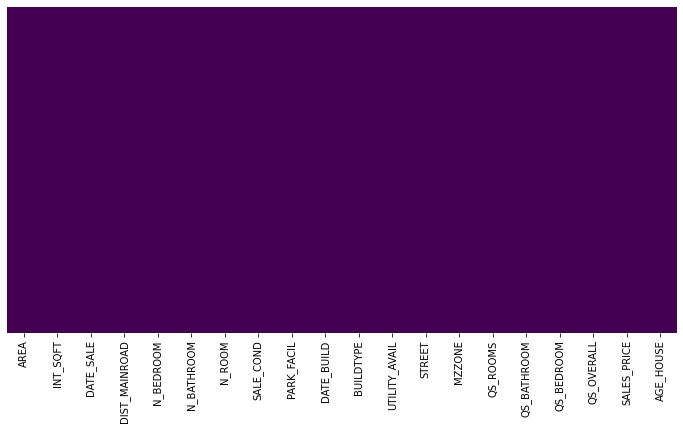

In [139]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
df.iloc[0:10,0:14]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C
5,Chrompet,1220,2014-09-11,36,2,1,4,Partial,No,2009-09-12,Commercial,NoSeWa,No Access,RH
6,Chrompet,1167,2007-04-05,137,1,1,3,Partial,No,1979-04-12,Others,AllPub,No Access,RL
7,Velachery,1847,2006-03-13,176,3,2,5,Family,No,1996-03-15,Commercial,AllPub,Gravel,RM
8,Chrompet,771,2011-04-06,175,1,1,2,AdjLand,No,1977-04-14,Others,NoSewr,Paved,RM
9,Velachery,1635,2006-06-22,74,2,1,4,AbNormal,No,1991-06-26,Others,ELO,No Access,I


**EDA**

In [141]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


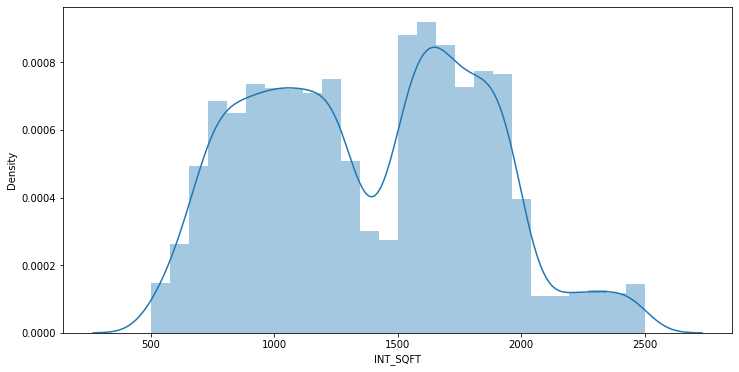

In [142]:
sns.distplot(df["INT_SQFT"])
plt.show()

From the above observation----> 1.There is no evidence for normal distribution
                                2.There is no effective skew in the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


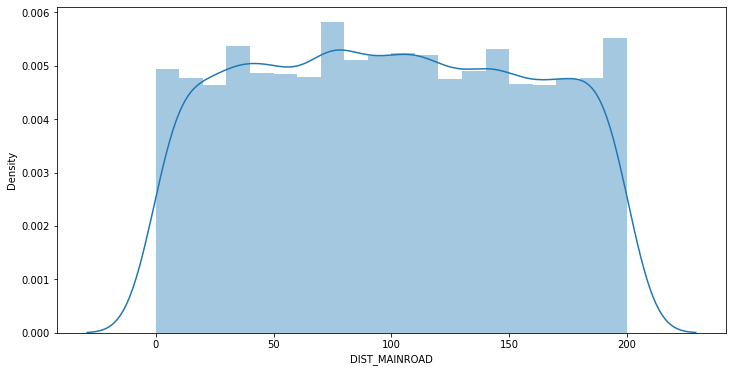

In [143]:
sns.distplot(df["DIST_MAINROAD"])

From the above Observation----> 1.It follows uniform distribution
                                2.The amount of data between 0 to 200 distance from mainroad is uniformly distributed
                                3. There is no skew in the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


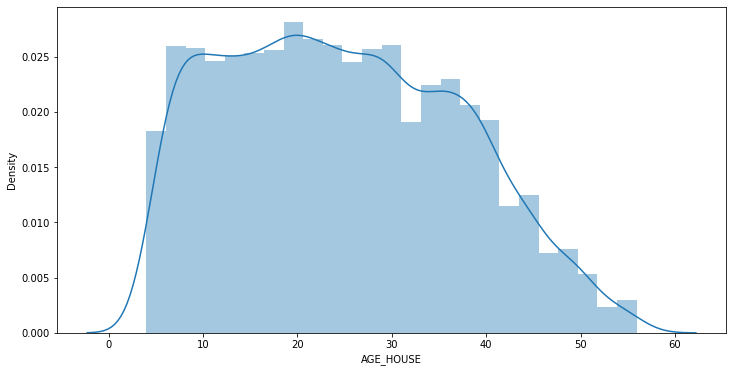

In [144]:
sns.distplot(df.AGE_HOUSE)

In [145]:
N_BEDROOM_NAME = df.N_BEDROOM.value_counts().index

In [146]:
N_BEDROOM_VAL = df.N_BEDROOM.value_counts().values

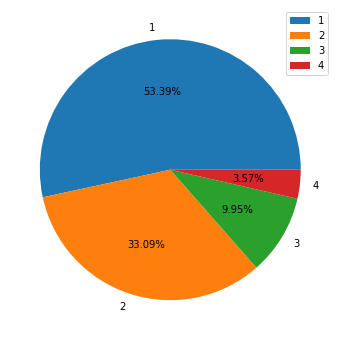

In [147]:
plt.pie(N_BEDROOM_VAL, labels=N_BEDROOM_NAME,autopct= '%1.2f%%')
plt.legend()
plt.show()

Observation----> 1 Bedroom building had more in percentage---->
                 4 Bedroom building had least in percentage

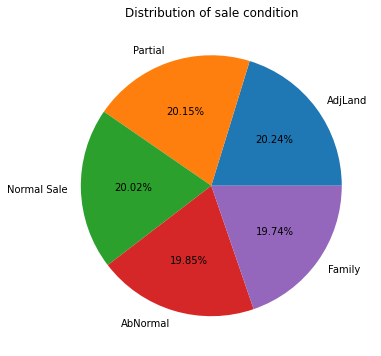

In [148]:
SALE_COND_Name= df.SALE_COND.value_counts().index
SALE_COND_Val= df.SALE_COND.value_counts().values
plt.pie(SALE_COND_Val, labels= SALE_COND_Name, autopct ="%1.2f%%")
plt.title("Distribution of sale condition")
plt.show()

Observation----> Every SALE_COND has approximately equal in value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


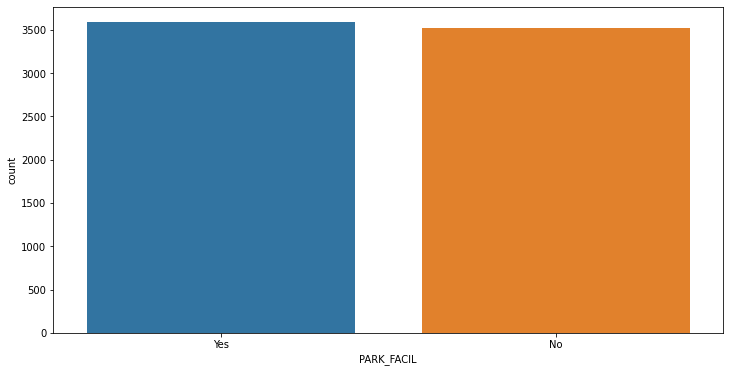

In [149]:
sns.countplot(df.PARK_FACIL)

Observation----> Both parking and no parking facilites are approximately equal in amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


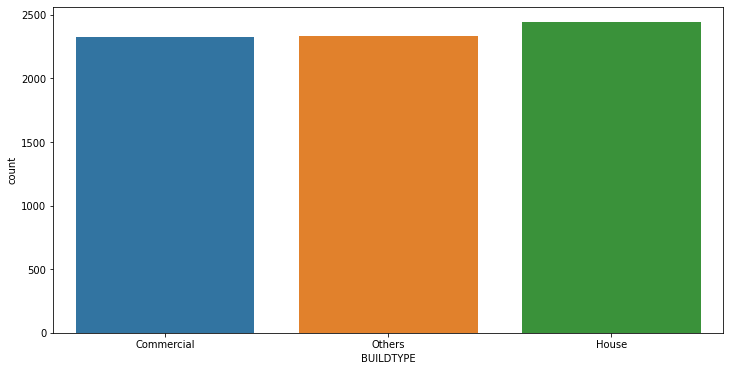

In [150]:
sns.countplot(df.BUILDTYPE)

Observation----> House type of building has more when compared to commercial and others buildtype

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


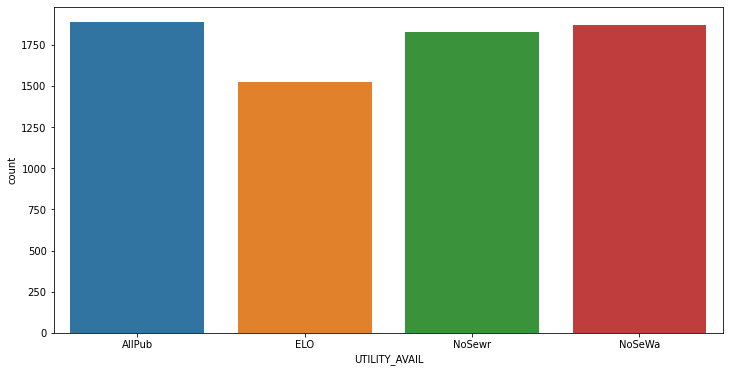

In [151]:
sns.countplot(df.UTILITY_AVAIL)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


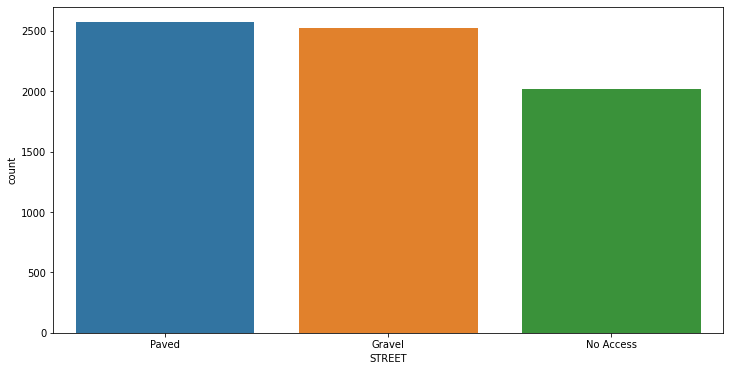

In [152]:
sns.countplot(df.STREET)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


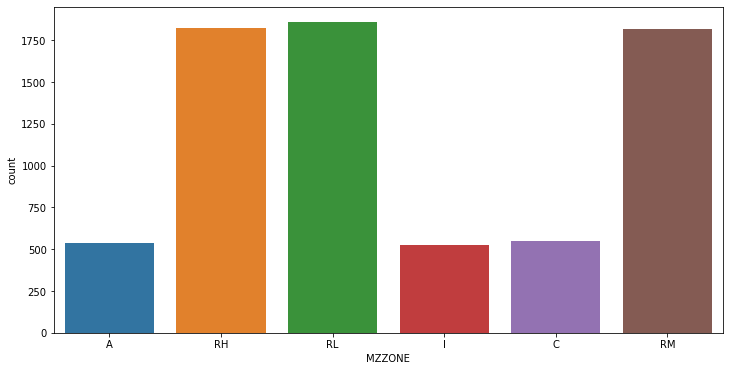

In [153]:
sns.countplot(df.MZZONE)

Observation-----> RL zone have more buildings

Multivariate analysis

In [154]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

AREA
Adyar          953.5
Anna Nagar    1756.0
Chrompet      1008.0
KK Nagar      1911.0
Karapakkam    1114.0
T Nagar       1778.0
Velachery     1738.0
Name: INT_SQFT, dtype: float64


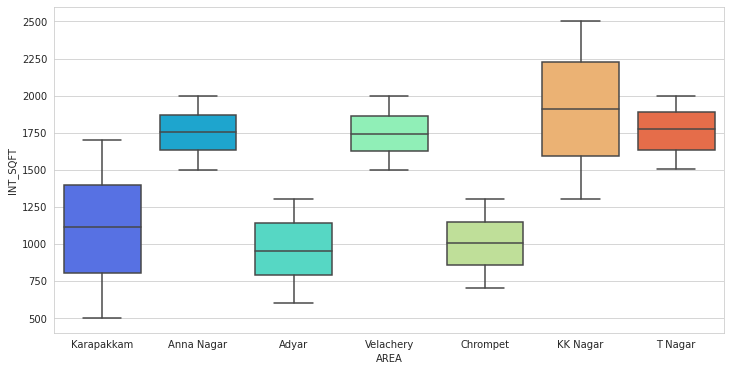

In [155]:
df_area= df.groupby("AREA")["INT_SQFT"].median()
print(df_area)
sns.set_style("whitegrid")
sns.boxplot(x='AREA',y='INT_SQFT',data=df,palette='rainbow')

From above observation------> 1. large size buildings are available in  KK nagar area   2.  Anna nagar, Velachery, T nagar have approximately equal in size(INT_SQFT)

                            

AREA
Adyar         23.544631
Anna Nagar    25.969048
Chrompet      22.357749
KK Nagar      17.933291
Karapakkam    28.711062
T Nagar       26.245577
Velachery     30.308631
Name: AGE_HOUSE, dtype: float64


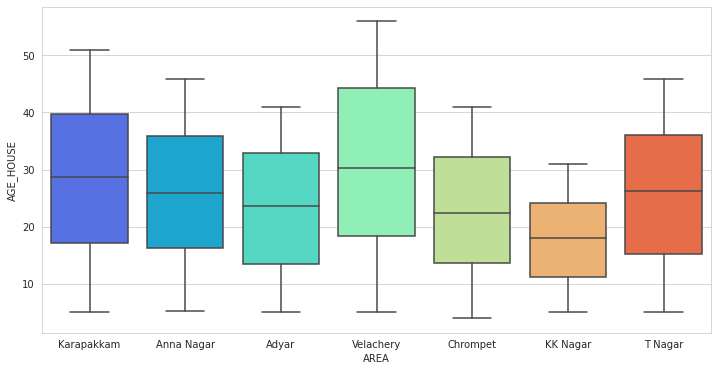

In [156]:
df_area_1= df.groupby("AREA")["AGE_HOUSE"].median()
print(df_area_1)
sns.boxplot(x='AREA',y='AGE_HOUSE',data=df,palette='rainbow')

Observation----> Velachery area has more number of old buildings

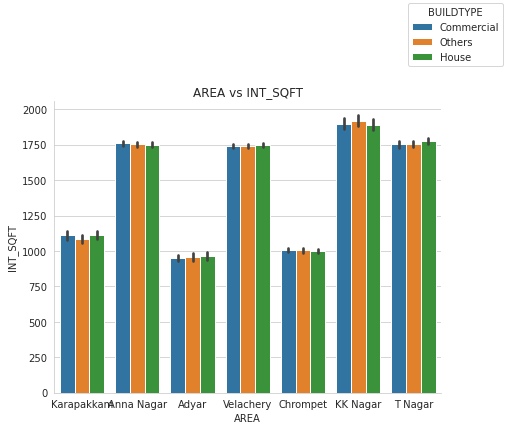

In [157]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,18)

x= sns.catplot(x="AREA", y="INT_SQFT", hue="BUILDTYPE", kind="bar", data=df)
sns.move_legend(x, "lower center", bbox_to_anchor=(1, 1), title='BUILDTYPE')
plt.title("AREA vs INT_SQFT")
plt.tight_layout()
plt.show()


Observation-----> KK Nagar area have more number of large house, large commerical buildtype, large in others types of buildtype

In [158]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

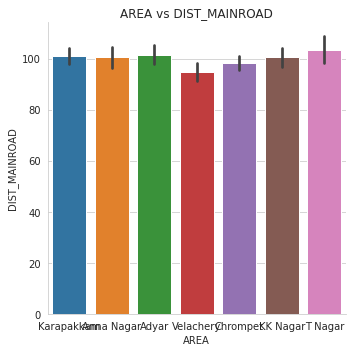

In [159]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,18)

x= sns.catplot(x="AREA", y="DIST_MAINROAD", kind="bar", data=df)
plt.title("AREA vs DIST_MAINROAD")
plt.tight_layout()
plt.show()


Observation----> Buildings available in T nagar vary from zero to above 100m distance from mainroad

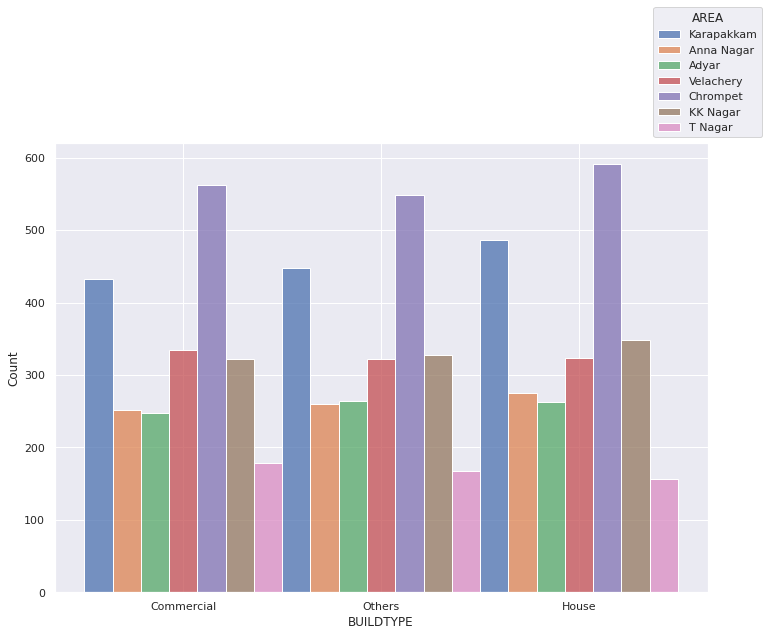

In [160]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.histplot(data=df, x="BUILDTYPE", hue="AREA", multiple="dodge")
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

Observation----> House, commercial and others type of buildings are more sale in chrompet area 

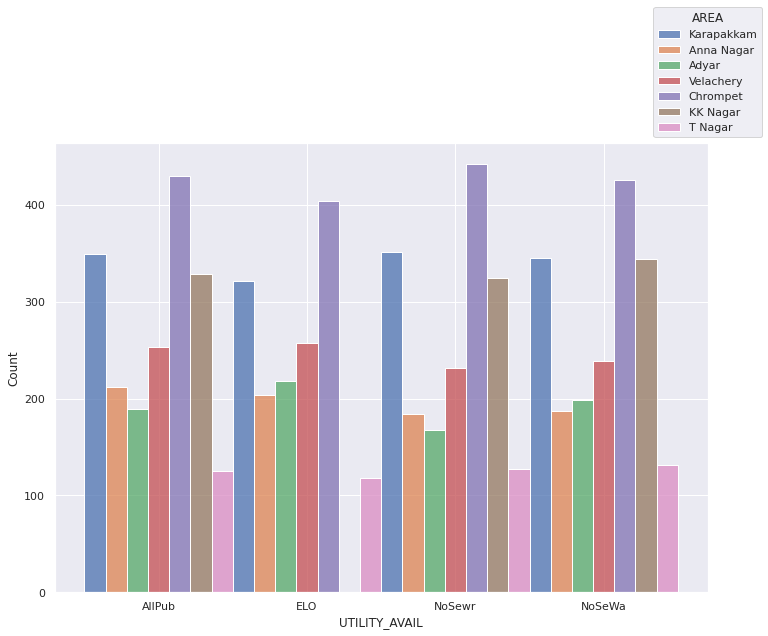

In [161]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.histplot(data=df, x="UTILITY_AVAIL", hue="AREA", multiple="dodge")
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

Observation---->1. KK nagar has no ELO type of utility
2.Buildings which have all type of utility avail are more in chrompet area


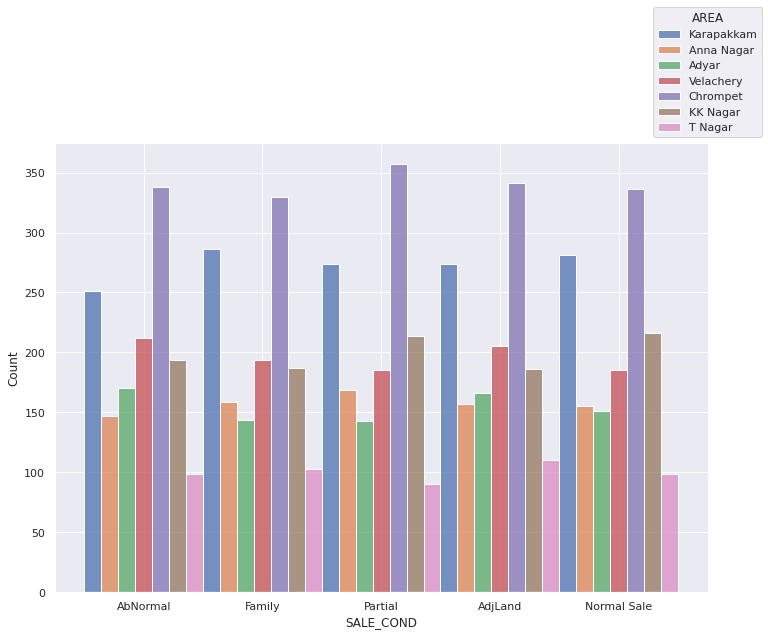

In [162]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.histplot(data=df, x="SALE_COND", hue="AREA", multiple="dodge")
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

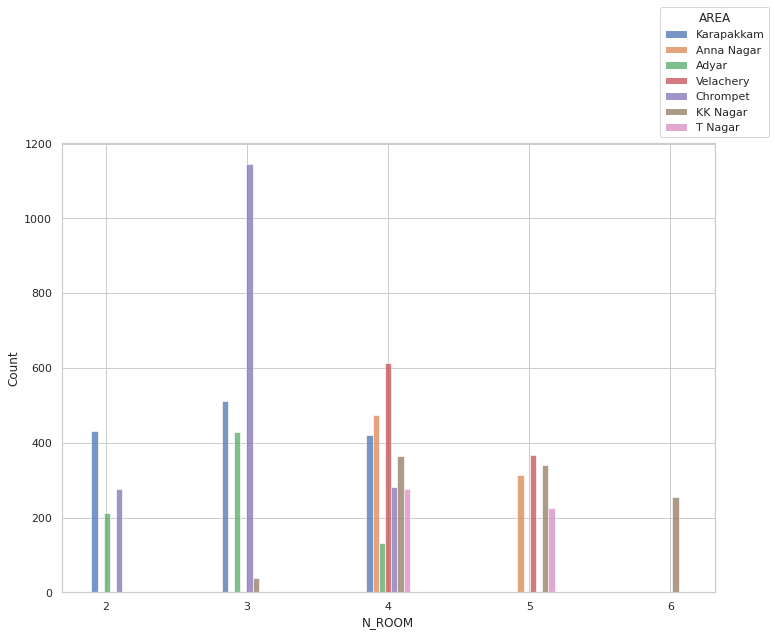

In [163]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.histplot(data=df, x="N_ROOM", hue="AREA", multiple="dodge", shrink=3)
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

Observation----> (i)3 room buildings in chrompet have highest sale (ii)6 room buildings is available in KK nagar only

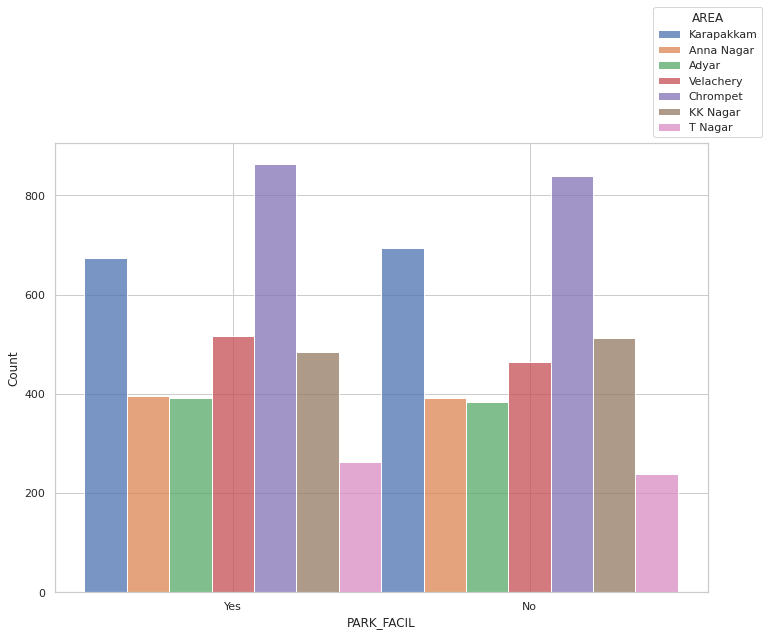

In [164]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.histplot(data=df, x="PARK_FACIL", hue="AREA", multiple="dodge", shrink=1)
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

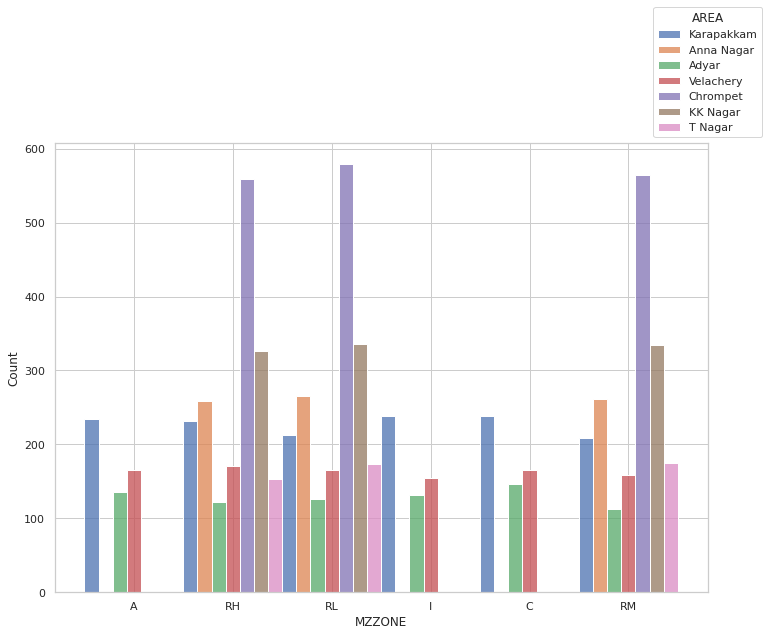

In [165]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.histplot(data=df, x="MZZONE", hue="AREA", multiple="dodge", shrink=1)
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

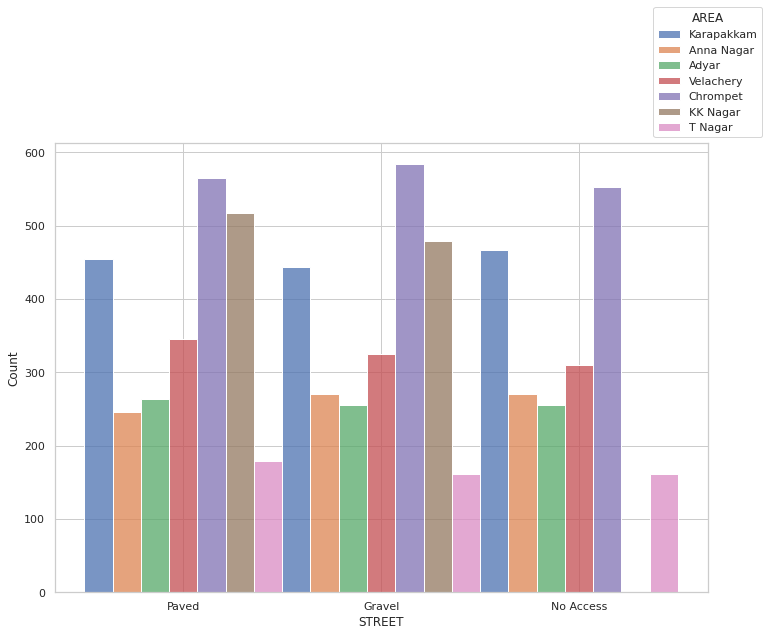

In [166]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.histplot(data=df, x="STREET", hue="AREA", multiple="dodge", shrink=1)
sns.move_legend(ax, "lower center", bbox_to_anchor=(1, 1), title='AREA')

Observation----> No access in KK nagar area 

**Feature vs Target**

In [167]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

Continuous feature vs target

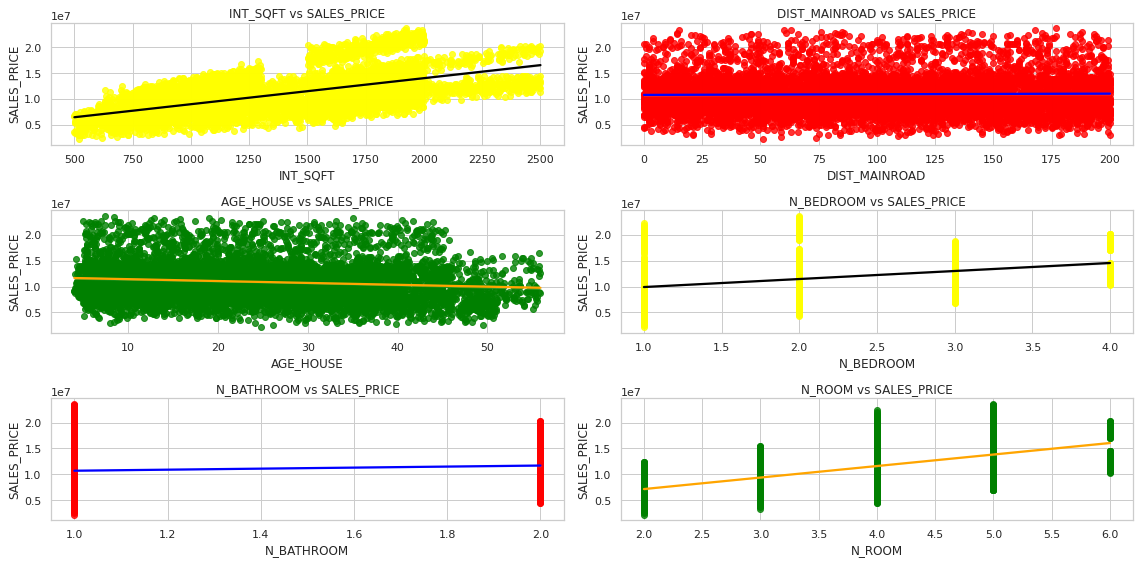

In [168]:
plt.subplots(3, 2, sharex=True, figsize=(16,8))
plt.subplot(321)  #figsize=(15,15)
sns.regplot(x=df.INT_SQFT,y= df.SALES_PRICE,scatter_kws={"color":"yellow"},line_kws={"color":"black"})
plt.title("INT_SQFT vs SALES_PRICE")
# plt.show()

plt.subplot(322)
sns.regplot(x=df.DIST_MAINROAD,y= df.SALES_PRICE,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("DIST_MAINROAD vs SALES_PRICE")
# plt.show()

plt.subplot(323)
sns.regplot(x=df.AGE_HOUSE,y= df.SALES_PRICE,scatter_kws={"color":"green"},line_kws={"color":"orange"})
plt.title("AGE_HOUSE vs SALES_PRICE")
plt.tight_layout()
# plt.show()

plt.subplot(324)  #figsize=(15,15)
sns.regplot(x=df.N_BEDROOM,y= df.SALES_PRICE,scatter_kws={"color":"yellow"},line_kws={"color":"black"})
plt.title("N_BEDROOM vs SALES_PRICE")
plt.tight_layout()
# plt.show()

plt.subplot(325)
sns.regplot(x=df.N_BATHROOM,y= df.SALES_PRICE,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("N_BATHROOM vs SALES_PRICE")
plt.tight_layout()
# plt.show()

plt.subplot(326)
sns.regplot(x=df.N_ROOM,y= df.SALES_PRICE,scatter_kws={"color":"green"},line_kws={"color":"orange"})
plt.title("N_ROOM vs SALES_PRICE")
plt.tight_layout()
# plt.show()




Observations 1------>INT_SQFT VS SALE_PRICE---->1. There is a relationship between feature and target  2. There is an evidence for linaer relationship(INT_SQFT increases -->SALE_PRICE also increase) 3. No transformation and no encoding are required

Observations 2-----> DIST_MAINROAD VS SALE_PRICE---->1. There is no relationship between feature and target   2. we can drop the feature(DIST_MAINROAD)


Observations 3-----> AGE_HOUSE VS SALE_PRICE----> 1.There is slight relationship between feature and target 2. slightly linear relationship 3. NO transformation and No encoding are required or do correlation

Observations 4-----> N_BEDROOM vs SALE_PRICE----->1.  There is a relationship between feature and target  2. There is an evidence for linaer relationship(N_BEDROOM increases -->SALE_PRICE also increase) 3. No transformation and no encoding are required

Observations 5-----> N_BATHROOM VS SALE_PRICE---->1. There is relationship between feature and target   2. There is an evidence for linear relationship(N_BATHROOM increase---> SALE_PRICE also increases)  3. NO transformation and No encoding are required or do correlation


Observations 6-----> N_ROOM VS SALE_PRICE----> 1.There is relationship between feature and target 2. There is an evidence for linear relationship 3. NO transformation and No encoding are required 

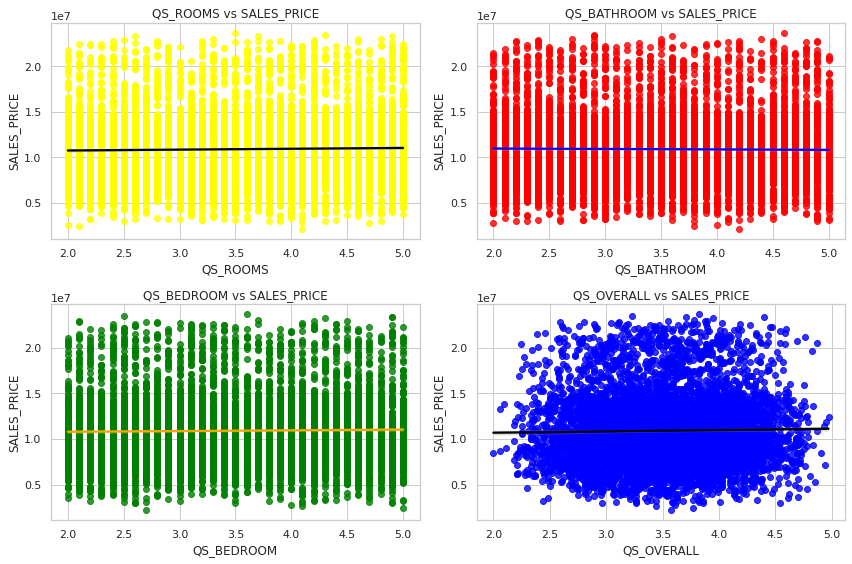

In [169]:
plt.subplots(2, 2, sharex=True, figsize=(12,8))
plt.subplot(221)  #figsize=(15,15)
sns.regplot(x=df.QS_ROOMS,y= df.SALES_PRICE,scatter_kws={"color":"yellow"},line_kws={"color":"black"})
plt.title("QS_ROOMS vs SALES_PRICE")
# plt.show()

# plt.figure()
plt.subplot(222)
#fig.add_subplot(222)
sns.regplot(x=df.QS_BATHROOM,y= df.SALES_PRICE,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("QS_BATHROOM vs SALES_PRICE")
# plt.show()

# plt.figure()
plt.subplot(223)
sns.regplot(x=df.QS_BEDROOM,y= df.SALES_PRICE,scatter_kws={"color":"green"},line_kws={"color":"orange"})
plt.title("QS_BEDROOM vs SALES_PRICE")
plt.tight_layout()
# plt.show()

# plt.figure()
plt.subplot(224)
sns.regplot(x=df.QS_OVERALL,y= df.SALES_PRICE,scatter_kws={"color":"blue"},line_kws={"color":"black"})
plt.title("QS_OVERALL vs SALES_PRICE")
plt.tight_layout()

Observations----> Above 4 plots have no relationship between feature and target.So,we can drop 4 feature 

Categorical feature vs target

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

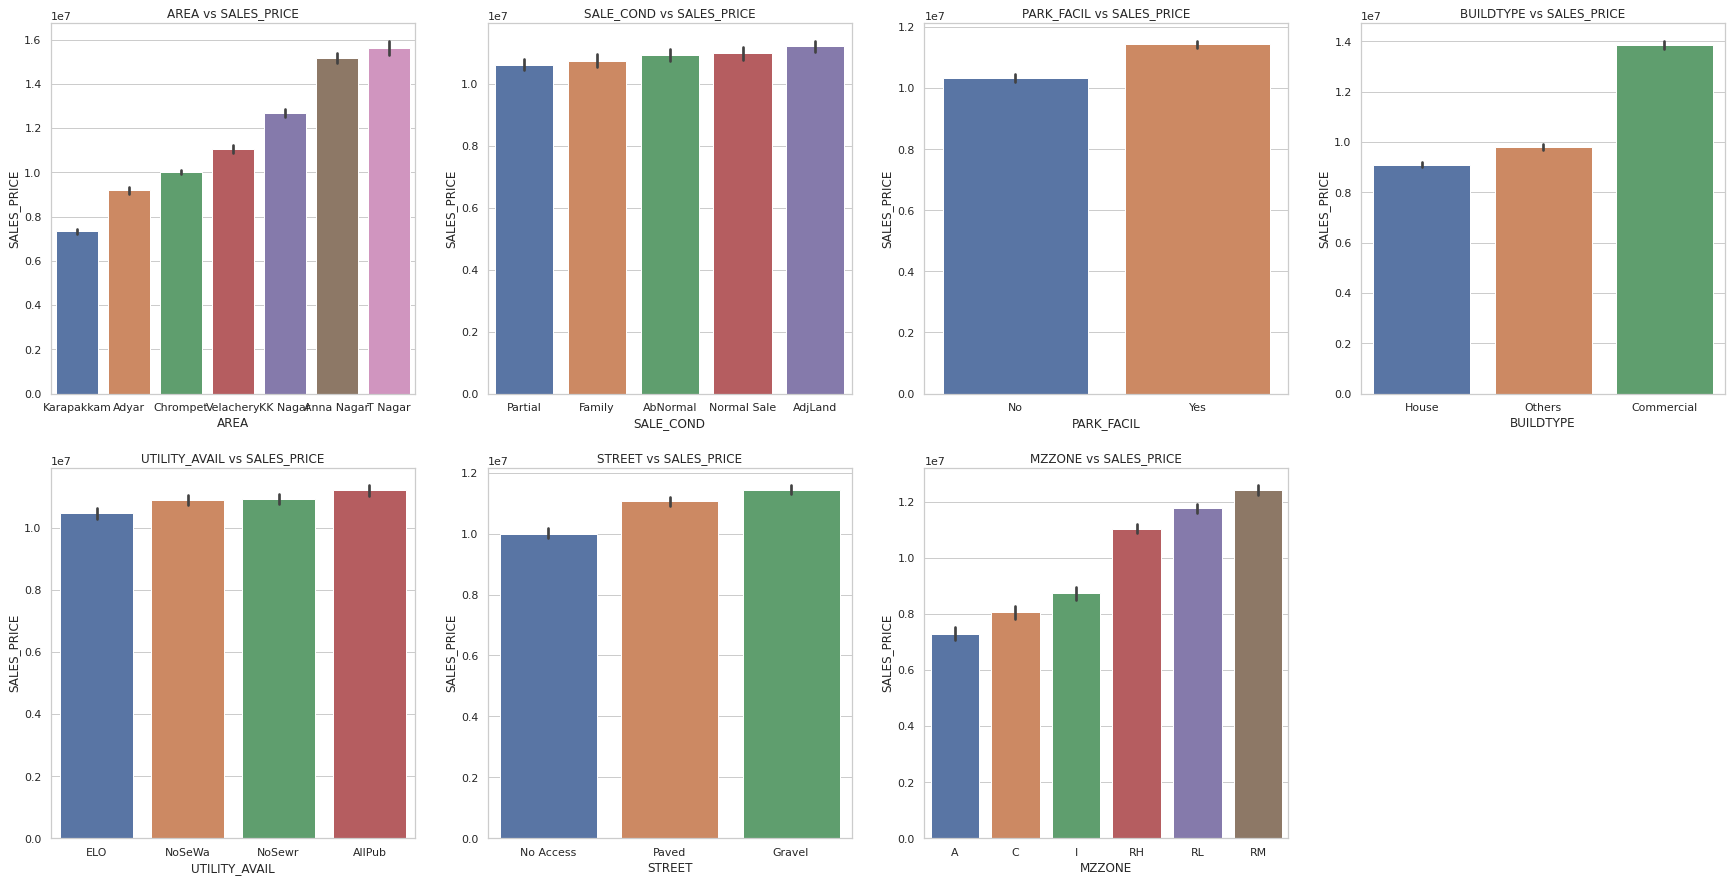

In [170]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

plt.subplot(242)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

plt.subplot(243)
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

plt.subplot(244)
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

plt.subplot(245)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.subplot(246)
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

plt.subplot(247)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

Observations----> AREA vs SALES_PRICE----> 1. There is a relationship between area and salesprice   2. There is an evidence for linear relationship between feature and target   3. Label encoding(ordinal encoding)

Observations----> SALE_COND vs SALES_PRICE----> 1. There is a slight relationship between SALE_COND and salesprice   2. There is an evidence for slightly linear relationship between feature and target   3. Label encoding(ordinal label)

Observations----> PARK_FACIL vs SALES_PRICE----> 1. There is a relationship between PARK_FACIL and salesprice   2. There is an evidence for linear relationship between feature and target   3. Label encoding(binary encoding)


Observations----> BUILDTYPE vs SALES_PRICE----> 1. There is a no relationship between BUILDTYPE and salesprice(exponentially increase).   2. Do one hot encoding(no ordinal)

Observations----> UTILITY_AVAIL vs SALES_PRICE----> 1. There is a relationship between UTILITY_AVAIL and salesprice   2. There is an evidence for linear relationship between feature and target   3. Label encoding(ordinal encoding)


Observations----> Street vs SALES_PRICE----> 1. There is a slight relationship between Street and salesprice   2. There is an evidence for slightly linear relationship between feature and target   3. Label encoding(ordinal label)

Observations----> MZZONE vs SALES_PRICE----> 1. There is a relationship between MZZONE and salesprice   2. There is an evidence for linear relationship between feature and target   3. Label encoding(ordinal encoding)

**ENCODING**

In [171]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE_HOUSE'],
      dtype='object')

AREA encoding

In [172]:
df.AREA = df.AREA.map({"Karapakkam":1,'Adyar':2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})

In [173]:
df.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

SALE_COND encoding

In [174]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [175]:
df.SALE_COND= df.SALE_COND.map({"Partial":1, "Family":2,"AbNormal":3,"Normal Sale":4,"AdjLand":5})

In [176]:
df.SALE_COND.unique()

array([3, 2, 1, 5, 4])

PARK_FACIL

In [177]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [178]:
df.PARK_FACIL = df.PARK_FACIL.map({"No":0, "Yes":1})

In [179]:
df.PARK_FACIL.unique()

array([1, 0])

BUILDTYPE

In [180]:
df = pd.get_dummies(df,columns = ["BUILDTYPE"]) #one hot encoding

UTILITY_AVAIL

In [181]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [182]:
# df.UTILITY_AVAIL= df.UTILITY_AVAIL.map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4})

In [183]:
df.UTILITY_AVAIL= df.UTILITY_AVAIL.map({"ELO":1, "NoSeWa":2,"NoSewr":3,"AllPub":4})

In [184]:
df.UTILITY_AVAIL.unique()

array([4, 1, 3, 2])

STREET

In [185]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [186]:
df.STREET= df.STREET.map({"No Access":1,"Paved":2,"Gravel":3})

In [187]:
df.STREET.unique()

array([2, 3, 1])

MZZONE

In [188]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [189]:
df.MZZONE= df.MZZONE.map({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})

In [190]:
df.MZZONE.unique()

array([1, 4, 5, 3, 2, 6])

In [191]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,2011-05-04,131,1,1,3,3,1,1967-05-15,...,1,4.0,3.9,4.9,4.330,7600000,44.337666,1,0,0
1,6,1986,2006-12-19,26,2,1,5,3,0,1995-12-22,...,4,4.9,4.2,2.5,3.765,21717770,11.964654,1,0,0
2,2,909,2012-02-04,70,1,1,3,3,1,1992-02-09,...,5,4.1,3.8,2.2,3.090,13159200,20.093500,1,0,0
3,4,1855,2010-03-13,14,3,2,5,2,0,1988-03-18,...,3,4.7,3.9,3.6,4.010,9630290,22.196212,0,0,1
4,1,1226,2009-10-05,84,1,1,3,3,1,1979-10-13,...,2,3.0,2.5,4.1,3.290,7406250,30.760385,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-01-03,51,1,1,2,5,0,1962-01-15,...,6,3.0,2.2,2.4,2.520,5353000,49.005798,0,0,1
7105,4,1897,2004-04-08,52,3,2,5,2,1,1995-04-11,...,4,3.6,4.5,3.3,3.920,10818480,9.267815,0,0,1
7106,4,1614,2006-08-25,152,2,1,4,4,0,1978-09-01,...,3,4.3,4.2,2.9,3.840,8351410,28.646721,0,1,0
7107,1,787,2009-08-03,40,1,1,2,1,1,1977-08-11,...,5,4.6,3.8,4.1,4.160,8507000,32.586569,1,0,0


In [192]:
del df['QS_ROOMS']

In [193]:
del df['QS_BATHROOM']

In [194]:
del df['QS_BEDROOM']

In [195]:
del df['QS_OVERALL']

In [196]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,2011-05-04,131,1,1,3,3,1,1967-05-15,4,2,1,7600000,44.337666,1,0,0
1,6,1986,2006-12-19,26,2,1,5,3,0,1995-12-22,4,3,4,21717770,11.964654,1,0,0
2,2,909,2012-02-04,70,1,1,3,3,1,1992-02-09,1,3,5,13159200,20.093500,1,0,0
3,4,1855,2010-03-13,14,3,2,5,2,0,1988-03-18,3,2,3,9630290,22.196212,0,0,1
4,1,1226,2009-10-05,84,1,1,3,3,1,1979-10-13,4,3,2,7406250,30.760385,0,0,1


In [197]:
df.shape

(7108, 18)

In [198]:
df= df.drop(columns=["DATE_SALE","DATE_BUILD"])

In [199]:
df.shape

(7108, 16)

In [200]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,1,4,2,1,7600000,44.337666,1,0,0
1,6,1986,26,2,1,5,3,0,4,3,4,21717770,11.964654,1,0,0
2,2,909,70,1,1,3,3,1,1,3,5,13159200,20.093500,1,0,0
3,4,1855,14,3,2,5,2,0,3,2,3,9630290,22.196212,0,0,1
4,1,1226,84,1,1,3,3,1,4,3,2,7406250,30.760385,0,0,1


In [201]:
df.columns


Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'AGE_HOUSE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [202]:
df.shape

(7108, 16)

**Split the data**

In [203]:
# X = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others']].values #array of features
# y = df['SALES_PRICE'].values #array of targets

X= df.drop('SALES_PRICE', axis=1)
y= df['SALES_PRICE']

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Scaling**

In [205]:
from sklearn.preprocessing import StandardScaler # standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Linear_regression(Model training)**

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 5080973.52488562,  5972216.68000224,  9842154.18077552, ...,
       13514376.87485983, 13497596.23577767,  6247693.05040539])

In [207]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'], columns=['Coefficient'])
coeff_df

,Coefficient
AREA,1.069599e+06
INT_SQFT,6.753060e+05
DIST_MAINROAD,8.539810e+03
N_BEDROOM,-1.264736e+06
N_BATHROOM,9.397744e+04
N_ROOM,1.744755e+06
SALE_COND,2.271089e+05
PARK_FACIL,5.173378e+05
UTILITY_AVAIL,5.418889e+04
STREET,3.934088e+05


The most important feature in linear regression is N Room---> N room has highest absolute coefficient

In [208]:
regressor.intercept_ # c 

10897107.694336968

In [209]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2101,5940040,5.080974e+06
1286,5878000,5.972217e+06
925,9831120,9.842154e+06
3765,12183080,1.278753e+07
4360,12754380,1.302721e+07
...,...,...
3749,10285360,9.697055e+06
250,9463900,9.059697e+06
1504,13526040,1.351438e+07
886,13140580,1.349760e+07


In [210]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9206692249045834




1.   R2 ranges between -infinity to 1

2.   r2 =1(better the model),  
     r2 =0(basline value)

3.   higher the r square---> Better the model---> Linear regression ---> R2= 0.92066(better the model)




# **Recursive Feature Elimination(RFE)**

In [211]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)

selector = selector.fit(X_train, y_train)

list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'],selector.support_))

list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'],selector.ranking_))

[('AREA', 7),
 ('INT_SQFT', 14),
 ('DIST_MAINROAD', 15),
 ('N_BEDROOM', 5),
 ('N_BATHROOM', 10),
 ('N_ROOM', 4),
 ('SALE_COND', 11),
 ('PARK_FACIL', 6),
 ('UTILITY_AVAIL', 12),
 ('STREET', 9),
 ('MZZONE', 8),
 ('AGE_HOUSE', 13),
 ('BUILDTYPE_Commercial', 3),
 ('BUILDTYPE_House', 1),
 ('BUILDTYPE_Others', 2)]

In [212]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)

selector = selector.fit(X_train, y_train)

list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'],selector.support_))

list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'],selector.ranking_))

[('AREA', 5),
 ('INT_SQFT', 12),
 ('DIST_MAINROAD', 13),
 ('N_BEDROOM', 3),
 ('N_BATHROOM', 8),
 ('N_ROOM', 2),
 ('SALE_COND', 9),
 ('PARK_FACIL', 4),
 ('UTILITY_AVAIL', 10),
 ('STREET', 7),
 ('MZZONE', 6),
 ('AGE_HOUSE', 11),
 ('BUILDTYPE_Commercial', 1),
 ('BUILDTYPE_House', 1),
 ('BUILDTYPE_Others', 1)]

In [213]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)

selector = selector.fit(X_train, y_train)

list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET','MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial','BUILDTYPE_House', 'BUILDTYPE_Others'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('AGE_HOUSE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', True),
 ('BUILDTYPE_Others', True)]

**KNN(k-nearest neighbor)(Model Training)**

In [214]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

In [215]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i," Train Accuracy : ", knn.score(X_train_scaled,y_train), " Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model

K value  :  1  Train Accuracy :  1.0  Val Accuracy :  0.9101003191822702
K value  :  2  Train Accuracy :  0.9788947468032815  Val Accuracy :  0.9311207410125881
K value  :  3  Train Accuracy :  0.9705792414078146  Val Accuracy :  0.935799875956066
K value  :  4  Train Accuracy :  0.9657423211469375  Val Accuracy :  0.9384012010418644
K value  :  5  Train Accuracy :  0.9622888297307445  Val Accuracy :  0.9397008895119485
K value  :  6  Train Accuracy :  0.9595889184670199  Val Accuracy :  0.9397055037285856
K value  :  7  Train Accuracy :  0.9577302645582151  Val Accuracy :  0.9386817294326681
K value  :  8  Train Accuracy :  0.955666780046414  Val Accuracy :  0.9374731015714314
K value  :  9  Train Accuracy :  0.9531153811257166  Val Accuracy :  0.9369187081866505
K value  :  10  Train Accuracy :  0.9510109490871812  Val Accuracy :  0.935605363126359
K value  :  20  Train Accuracy :  0.9356075122720545  Val Accuracy :  0.9241473981422346
K value  :  50  Train Accuracy :  0.911909412452

(i) high cross validation score give best k value 

(ii)The best value of k here is 6 because cross validation score for depth 6 is 0.9397055(highest)

In [216]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
y_pred

array([ 6306458.33333333,  7082436.66666667, 10343033.33333333, ...,
       13216803.33333333, 11841878.33333333,  7610219.16666667])

In [217]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9375517301795877


1.   R2 ranges between -infinity to 1

2.   r2 =1(better the model),  
     r2 =0(basline value)

3.   higher the r square---> Better the model---> k-nearest neighbor ---> R2= 0.93755(better the model)

**Decision Tree(Model training)**

In [218]:
from sklearn.tree import DecisionTreeRegressor


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred

array([ 5737000.,  5976000., 10030670., ..., 13039560., 13668850.,
        8287250.])

Evaluation metrics


In [219]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9708795095343244


In [220]:
# from sklearn.metrics import  r2_score

# # Compute y_pred
# y_pred = dt.predict(X_test)

# # Compute r2_dt
# rsquared = r2_score(y_test,y_pred)
# # Compute rmse_dt


# # Print r2_dt
# print("Test set R2 of dt: {:.2f}".format(rsquared))

Reducing overfit

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import  r2_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train_scaled, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train_scaled)) # this is useless information - i am showing to prove a point(which is under fit or overfit)
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.3627899700888272  Cross val score :  0.35935204993172365
Depth  :  2  Training Accuracy :  0.6886534191045883  Cross val score :  0.6860153977573101
Depth  :  3  Training Accuracy :  0.8057145298629238  Cross val score :  0.8041883656441338
Depth  :  4  Training Accuracy :  0.8878860457422197  Cross val score :  0.8839140156506262
Depth  :  5  Training Accuracy :  0.9224323412673976  Cross val score :  0.9150213035748903
Depth  :  6  Training Accuracy :  0.9451177631133534  Cross val score :  0.938150658783073
Depth  :  7  Training Accuracy :  0.9610332859766615  Cross val score :  0.9513995268742503
Depth  :  8  Training Accuracy :  0.9737404364453979  Cross val score :  0.9614761776941098
Depth  :  9  Training Accuracy :  0.9832628708479938  Cross val score :  0.9664081624215799
Depth  :  10  Training Accuracy :  0.9901853873858  Cross val score :  0.9687326028520458


(i) high cross validation score give best k value 

(ii)The best value of k here is 10 because cross validation score for depth 10 is 0.
96898(highest)

In [222]:
from matplotlib import pyplot
import numpy as np
dt = DecisionTreeRegressor(max_depth = 10)
# Fit dt to the training set
dt.fit(X_train_scaled, y_train)
y_pred_new= dt.predict(X_test_scaled)
importance = dt.feature_importances_
importance
# list(zip(importance,[X_test.columns]))  # it calculates the feature importances based on IG
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9708795095343244


In [223]:
 list(zip(importance,X_test.columns))

[(0.48468621863640843, 'AREA'),
 (0.10114762467553622, 'INT_SQFT'),
 (0.0005808277457090068, 'DIST_MAINROAD'),
 (0.00010215202705305041, 'N_BEDROOM'),
 (0.010227380838992363, 'N_BATHROOM'),
 (4.284231896967991e-05, 'N_ROOM'),
 (0.0012786919854420036, 'SALE_COND'),
 (0.01530478671184298, 'PARK_FACIL'),
 (0.0005114629228757783, 'UTILITY_AVAIL'),
 (0.010818405270391499, 'STREET'),
 (0.038680232575358055, 'MZZONE'),
 (0.0028150368819642203, 'AGE_HOUSE'),
 (0.32909337298557323, 'BUILDTYPE_Commercial'),
 (0.003802968216598352, 'BUILDTYPE_House'),
 (0.000907996207285136, 'BUILDTYPE_Others')]

From above observations----> Area is an important feature

<BarContainer object of 15 artists>

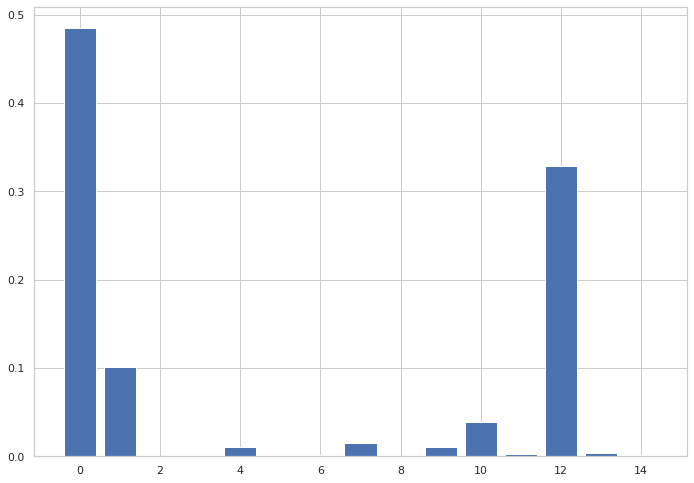

In [224]:
pyplot.bar([x for x in range(len(importance))], importance)

In [225]:
# # import export_graphviz
# from sklearn.tree import export_graphviz 
  
# # export the decision tree to a tree.dot file
# # for visualizing the plot easily anywhere
# export_graphviz(dt, out_file ='tree.dot',
#                feature_names =X_test.columns) 

1.   R2 ranges between -infinity to 1

2.   r2 =1(better the model),  
     r2 =0(basline value)

3.   higher the r square---> Better the model---> Decision Tree ---> R2=0.970380(better the model)

**RANDOM FOREST(MODEL TRAINING)**

In [226]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
 
rf_regressor = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')  

# Train the model on training data
rf_regressor.fit(X_train_scaled, y_train)

# Use the forest's predict method on the test data
predictions = rf_regressor.predict(X_test_scaled)


#r2_score(baseline_preds, original_test_labels)
r2_score(predictions, y_test)

0.9837235771658567

Random foreset--->Bagged decision tree---> Model----> overfit


To avoid overfit--->1. max_depth= log2(no.of.features)  2.max_freatures=sqrt(features)

In [227]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
 
rf_regressor = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt', random_state=1)   #max_depth= log2(no.of.features)  #max_freatures=sqrt(features) 

# Train the model on training data
rf_regressor.fit(X_train_scaled, y_train)

# Use the forest's predict method on the test data
predictions = rf_regressor.predict(X_test_scaled)


#r2_score(baseline_preds, original_test_labels)
r2_score(predictions, y_test)

0.726295030173099

1.   R2 ranges between -infinity to 1

2.   r2 =1(better the model),  
     r2 =0(basline value)

3.   higher the r square---> Better the model---> Random forest ---> better model

# Variable Importances

In [228]:
# Get numerical feature importances
importances = list(rf_regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_test.columns, importances)]
feature_importances

[('AREA', 0.26),
 ('INT_SQFT', 0.19),
 ('DIST_MAINROAD', 0.0),
 ('N_BEDROOM', 0.03),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.11),
 ('SALE_COND', 0.0),
 ('PARK_FACIL', 0.01),
 ('UTILITY_AVAIL', 0.0),
 ('STREET', 0.0),
 ('MZZONE', 0.08),
 ('AGE_HOUSE', 0.01),
 ('BUILDTYPE_Commercial', 0.22),
 ('BUILDTYPE_House', 0.06),
 ('BUILDTYPE_Others', 0.03)]

In [229]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)   #sorted based on importance-->key 1   variable----> key 0   ---> lambda x:x[1]
feature_importances

[('AREA', 0.26),
 ('BUILDTYPE_Commercial', 0.22),
 ('INT_SQFT', 0.19),
 ('N_ROOM', 0.11),
 ('MZZONE', 0.08),
 ('BUILDTYPE_House', 0.06),
 ('N_BEDROOM', 0.03),
 ('BUILDTYPE_Others', 0.03),
 ('PARK_FACIL', 0.01),
 ('AGE_HOUSE', 0.01),
 ('DIST_MAINROAD', 0.0),
 ('N_BATHROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('STREET', 0.0)]

In [230]:
# # Print out the feature and importances 
# [print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances]
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AREA                 Importance: 0.26
Variable: BUILDTYPE_Commercial Importance: 0.22
Variable: INT_SQFT             Importance: 0.19
Variable: N_ROOM               Importance: 0.11
Variable: MZZONE               Importance: 0.08
Variable: BUILDTYPE_House      Importance: 0.06
Variable: N_BEDROOM            Importance: 0.03
Variable: BUILDTYPE_Others     Importance: 0.03
Variable: PARK_FACIL           Importance: 0.01
Variable: AGE_HOUSE            Importance: 0.01
Variable: DIST_MAINROAD        Importance: 0.0
Variable: N_BATHROOM           Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0


From above observations---->The most important feature is AREA

Cumulative importance

In [231]:
# # List of features sorted from most to least important
# sorted_importances = [importance[1] for importance in feature_importances]
# # sorted_importances
# sorted_features = [importance[0] for importance in feature_importances]

# #cumulative importances
# cumulative_importances = np.cumsum(sorted_importances)
# cumulative_importances

In [232]:
# # Find number of features for cumulative importance of 95%
# # Add 1 because Python is zero-indexed
# print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0] [0] +1)

Create new train and test dataset retaining only 2 most important features

In [233]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:2]]
#important_feature_names

# List of features for later use
list_of_feature = list(X_test.columns)
#list_of_feature

# Find the columns of the most important features
important_indices = [list_of_feature.index(feature) for feature in important_feature_names]
#important_indices

# Create training and testing sets with two most important features
train_important = X_train_scaled[:, important_indices]
test_important = X_test_scaled[:, important_indices]

# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth = 2, max_features='auto')

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

#Evaluation metric
r2_score(predictions, y_test)

0.539502821329946

**XG BOOST(MODEL TRAINING)**

In [234]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for learning in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = learning, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train_scaled,y_train) #train the model
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", learning, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.36685356417995485  Cross-Val score :  -0.3774190673431111
Learning rate :  0.02  Train score :  0.74876483487807  Cross-Val score :  0.7453201763205848
Learning rate :  0.03  Train score :  0.925869492027561  Cross-Val score :  0.9232278104736473
Learning rate :  0.04  Train score :  0.9626867273798112  Cross-Val score :  0.9605035668551182
Learning rate :  0.05  Train score :  0.975230171807913  Cross-Val score :  0.9728967688110186
Learning rate :  0.06  Train score :  0.980786829758844  Cross-Val score :  0.9792761994226465
Learning rate :  0.07  Train score :  0.9853887227967265  Cross-Val score :  0.9835652174069187
Learning rate :  0.08  Train score :  0.9881844829892137  Cross-Val score :  0.9867216721370677
Learning rate :  0.09  Train score :  0.9912216273916967  Cross-Val score :  0.9888927365734161
Learning rate :  0.1  Train score :  0.991602696987967  Cross-Val score :  0.9906699592602786
Learning rate :  0.11  Train score :  0.9937

The best learning rate is 0.7 because high cross validation score(0.9965)

In [235]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train) #train the model
model.score(X_test_scaled, y_test) # scoring the model - r2 squared

[11:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9950034597007935

For this problem(Chennai house price prediction)---->High r2---> Better the model----> XG Boost algorithm (give high r-squared value-0.9950034) superior to other regression based algorithm 